In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y_eq = np.load('sig_no_yes.npy',allow_pickle=True )

In [3]:
y_ef = np.load('ef_sig_no_yes.npy',allow_pickle=True )

In [4]:
y_eq # 1 is deactivate

array([0., 1., 1., ..., 1., 1., 1.])

In [5]:
len( y_eq ) # 50 graphs X 80 bus stops per graph

4000

# 1 disFromCenter

In [6]:
graph_dic = np.load( 'test_set.npy',allow_pickle=True ).item()
number_graphs = 50
graph_dic_test = {}
for i in range(number_graphs):
    graph_dic_test[i] = graph_dic[i]

In [7]:
disFromCenter = []
for i in range(number_graphs):
    for j in range(80):
        b_p = np.array( graph_dic_test[i].bus_pos[j] )
        disFromCenter.append( np.linalg.norm( b_p - np.array( [22.5,22.5] ) ) )
disFromCenter = np.array( disFromCenter )

In [8]:
import pandas as pd
df = pd.DataFrame( {'y_eq':y_eq,'y_ef':y_ef,'disFromCenter':disFromCenter } )

In [9]:
df

,y_eq,y_ef,disFromCenter
0,0.0,0.0,15.247578
1,1.0,0.0,10.986200
2,1.0,1.0,7.689482
3,1.0,0.0,4.095255
4,1.0,1.0,1.253232
...,...,...,...
3995,0.0,1.0,5.845215
3996,0.0,1.0,9.575195
3997,1.0,1.0,12.678787
3998,1.0,1.0,16.551031


In [10]:
df = df.sort_values(by=['disFromCenter'])

In [11]:
df_0 = df.rolling(3000,min_periods=100).mean()

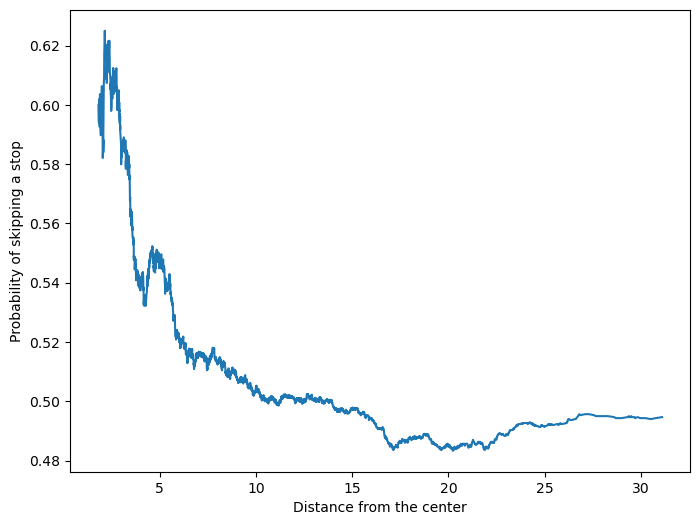

In [12]:
plt.figure(figsize=(8,6))
plt.plot(df['disFromCenter'],df_0['y_eq'])
plt.xlabel('Distance from the center')
plt.ylabel('Probability of skipping a stop')
plt.rcParams.update({'font.size': 16})
#plt.savefig("res_f4.jpg",dpi=600)
plt.show()

# 2 

In [13]:
graph_dic = np.load( 'test_set.npy',allow_pickle=True ).item()
number_graphs = 50
graph_dic_test = {}
for i in range(number_graphs):
    graph_dic_test[i] = graph_dic[i]

In [14]:
graph_dic[0].avg_frequency()

[21.022936920722916,
 23.239375074541403,
 21.61203700201896,
 21.507084934903194,
 21.494041634706647,
 22.143492644002823,
 22.548252299175076,
 21.979797118521034]

In [15]:
list_WT = []
for i in range(number_graphs):
    for j in range( 80 ):
        index_f = j//10
        list_WT.append( graph_dic[i].avg_frequency()[ index_f ] )

In [16]:
len( list_WT )

4000

In [17]:
df_1 = pd.DataFrame( {'y_eq':y_eq,'y_ef':y_ef,'WT':list_WT } )

In [18]:
df_1

,y_eq,y_ef,WT
0,0.0,0.0,21.022937
1,1.0,0.0,21.022937
2,1.0,1.0,21.022937
3,1.0,0.0,21.022937
4,1.0,1.0,21.022937
...,...,...,...
3995,0.0,1.0,21.811880
3996,0.0,1.0,21.811880
3997,1.0,1.0,21.811880
3998,1.0,1.0,21.811880


In [19]:
df_1 = df_1.sort_values(by=['WT'])

In [27]:
len( set( list( df_1['WT'])) )

400

In [37]:
df_2 = df_1.rolling(3000,min_periods=100).mean()

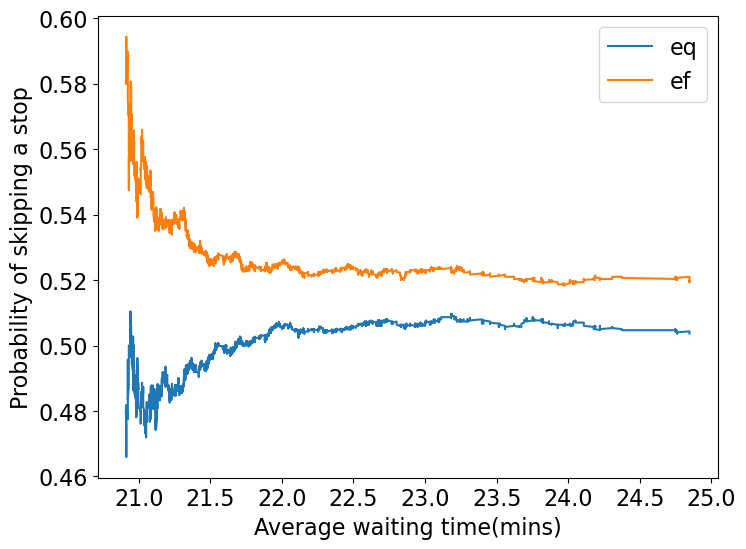

In [42]:
plt.figure(figsize=(8,6))
plt.plot(df_1['WT'],df_2['y_eq'],label='eq')
plt.plot(df_1['WT'],df_2['y_ef'],label='ef')
plt.xlabel('Average waiting time(mins)')
plt.ylabel('Probability of skipping a stop')
plt.rcParams.update({'font.size': 16})
#plt.savefig("res_f4.jpg",dpi=600)
plt.legend()
plt.show()